# <b> Evolución de opiniones en grupos de personas influenciadas por medios de comunicación 

En este trabajo, estudiaremos cómo las opiniones de las distintas personas que componen una sociedad evolucionan con el tiempo a medida que interactúan entre ellas. También estudiaremos la influencia de los medios de comunicación en este proceso.   

# Introducción

Cuando dos personas debaten sobre cierto tema, en general, ambos cambian (al menos un poco) su opinión sobre el tema en cuestión ya que la opinión de uno influye en la opinión del otro. Esta influencia puede ser mayor o menor, dependiendo de varios factores: qué tanto poder de convencimiento tenga la persona emisora, qué tan influenciable sea la persona receptora, qué tanta diferencia haya entre la opinión de uno y del otro, entre otros factores. De este modo, en una masa de personas que interactúan entre sí, las opiniones de todos los individuos van a ir variando constantemente, en mayor o menor medida.  
Por otro lado, al estudiar cómo las opiniones de los individuos de una sociedad van variando, debemos tener en cuenta el efecto de los medios de comunicación masivos. Estos emiten opiniones sobre temas que serán recibidas por gran parte de los individuos de la sociedad. También hay que tener en cuenta que algunas personas serán más influenciadas por ciertos medios, y otras por otros. 
En este trabajo, se tratará de estudiar cómo se comportan las opiniones de las personas que integran una sociedad y la influencia de los medios de comunicación masivos, teniendo en cuenta todos los factores anteriormente mencionados. Haremos varios experimentos alternando las condiciones iniciales de las personas que conforman la población, de la sociedad en general y de los medios de comunicación. 


# El modelo

En este modelo, asumiremos que las interacciones serán dos a dos. Es decir, cada interacción involucrará sólo a un emisor (persona o medio de comunicación) y a una persona receptora. 
Usaremos un parámetro p ∈ [-1,1] para medir la opinión que tenga cada persona sobre el tema a debatir. Valores de p cercanos a 1 ó -1, se corresponden con opiniones muy radicales y extremistas; valores de p cercanos a 0, representarán opiniones menos extremas.  
Al interactuar una persona receptora de opinión p, con un emisor de opinión p* (que podría ser una persona o un medio de comunicación), supondremos que el p de esta persona se modificará al valor p’ de la siguiente manera:  


<img src = 'formulitaP.jpeg'>

<p align = "center"> <i> Fórmula 1 </i>: fórmula de cálculo de nuevo p  </p>

Donde i ∈ [0 , 1] representa el nivel de influenciabilidad de la persona receptora y pc ∈ [0 , 1] representa el poder de convencimiento que tenga el emisor. Notar que h ≥ 0.  
Observar que la opinión de la persona receptora p, cambiará en la dirección de la opinión del emisor con el que esté interactuando, es decir, en la dirección de p$*$, debido al factor (p – p$*$) que está en el segundo término.  
El factor h se puso para tener en cuenta los efectos de la influenciabilidad de la persona receptora y el poder de convencimiento del emisor. Notar que en los casos extremos donde pc toma valores muy cercanos a 0 (es decir, la persona emisora es muy poco convincente) o donde i toma valores muy cercanos a 0 (es decir, la persona receptora es muy poco influenciable), h será cercano a 0 y por lo tanto el segundo término de la fórmula también, y por lo tanto p’ quedará muy parecido a p (es decir, la opinión de la persona receptora será cambiada muy poco). En el otro caso extremo (pc cercano a 1 y i cercano a 1), el h tomará un valor grande y por ende el p’ cambiará bastante con respecto de p (es decir, la opinión de la persona receptora será cambiada bastante). Notar que si p = p$*$, la opinión p no se alterará.  
El factor <img src = 'tricubica.png' width="90" height="90" /> se puso para tener en cuenta el efecto de que si las personas tuviesen opiniones muy diferentes entre sí (es decir, si p es fuese muy diferente de p*), la influencia que se harían mutuamente esas dos personas, tendería a ser más bien baja.  


En cuanto a los medios de comunicación, asumiremos que todos medios podrían ser oídos por todos los integrantes de la sociedad, pero tendremos en cuenta el hecho de que es mucho más probable que una persona reciba noticias de medios con opiniones afines a las suyas, que noticias de medios con opiniones muy diferentes. Además de esto, tendremos en cuenta que las personas que pasan mucho tiempo prestando atención a los medios, escucharán noticias con mucha más frecuencia que aquellas personas que no. Para tener en cuenta estos dos factores, se decidió que para cada emisión dada por cierto medio, cada persona de la sociedad tenga una probabilidad de escucharla dada por 

<img src = 'probaNoticia.jpeg'>

<p align = "center"> <i> Fórmula 2 </i>: fórmula de cálculo dde probabilidad de que una persona escuche una noticia </p>

donde p representa la opinión de la persona receptora, p$*$ la opinión del medio emisor y ts representa el "tiempo sillón" que indicaría cuánto tiempo dedica la persona receptora a oir noticias emitidas por medios. Notar, que cuánto más grande sea la diferencia entre p y p$*$ (o sea cuánto menos afín sea la opinión del medio con respecto a la opinión del receptor), menos será la probabilidad de que esa persona oiga esa noticia; y cuánto menos tiempo sillón (ts) tenga esa persona, también, menos probable será que la oiga.

# Estructura del modelo

Para simular este modelo, usaremos varios modelos atómicos llamados “Persona” que todos juntos conformarán un modelo acoplado llamado “Sociedad”. Por otro lado, habrá N modelos atómicos “Medio de comunicación” que interactuarán con todos los miembros de la sociedad.

<img src = 'topModel.jpeg' width="700" height="700" />

<p align = "center"> <i>Figura 1</i>: Esquema del top model </p>

El grafo que conecta a las personas en el modelo Sociedad, será definido mediante configuration model.

Si llamamos n al máximo grado de libertad de todos los nodos Persona que componen la sociedad, entonces, tenemos que cada Persona tendrá n + 1 puertos input: n de ellos se usarán para que la persona reciba información de sus personas conocidas y el puerto input restante se usará para que la persona reciba información proveniente de los distintos medios de comunicación. Por otro lado, cada persona tendrá n puertos output para emitir información a sus conocidos.

<img src = 'persona.jpeg' width="300" height="300" />

<p align = "center"> <i>Figura 2</i>: Esquema del modelo Persona </p>

Los modelos atómicos Medio de comunicación tendrán únicamente un puerto output que se conectará con el puerto inMedios del modelo Sociedad, por el que emitirán distintos comunicados de valor p$*$. Luego, a través de este puerto inMedios de Sociedad, se harán llegar las noticias emitidas por los distintos medios a todas las personas de la sociedad. Dada una noticia emitida por un medio, cada persona de la sociedad podrá oirla o no, según una probabilidad dada por la *fórmula 2*. 

# Simulación 

Comencemos importando algunas librerías que necesitaremos para hacer la simulación y el posterior análisis de datos.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

CDPP_TP1 = Path.cwd()
#CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
#BASE_BIN = CDPP_SRC.joinpath('bin')

### Simulador CD++

In [7]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1/src
#pwd
#Comentar make clean ante un error
#make clean

make -j4

make -C ../../../src/cd++ cd++ OUT_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1-main/src/bin MODEL_FLAGS=-DREGISTER_ATOMICS
make[1]: Entering directory '/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make -C /home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/cell OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make[2]: Entering directory '/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C queue OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C qss OBJ_DIR=obj

/usr/bin/ld: /home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1-main/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


## Simulación del modelo con CD++

Armamos un código para poder generar archivos model.ma según los distintos parámetros que elijamos poner en los distintos experimentos

In [8]:
import networkx as nx
import numpy as np
def generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, nroMedios, psMedios,
              periodos_emision, pcMedios, periodo_info=36000, file="model.ma"):
    
    grados[grados>maxG] = maxG
    if(grados.sum() % 2 != 0):
        if(grados[0] < maxG):
            grados[0] = grados[0]+1
        else:
            grados[0] = grados[0]-1
            
    ps[ps>1] = 1
    ps[ps<-1] = -1

    infs[infs>1] = 1
    infs[infs<0] = 0
    
    pcs[pcs>1] = 1
    pcs[pcs<0] = 0

    tss[infs>1] = 1
    tss[infs<0] = 0
    
    pms[pms<0] = 0    
    
    
    f = open(CDPP_TP1.joinpath("model/"+file),'w')
    f.write("[Top]\n")
    f.write("components : Sociedad\n")
    f.write("components : generador@Generator\n")
    for i in range(0,nroMedios):
        f.write("components : Medio"+str(i)+"@Medio\n")
    
    #f.write("in: infoRequest\n")

    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")
    
    #f.write("Link : infoRequest infoRequest@Sociedad\n")
    f.write("Link : out@generador infoRequest@Sociedad\n")
    for i in range(0,n):
        f.write("Link : info_out"+str(i)+"@Sociedad info_out"+str(i)+"\n")
        
    for i in range(0,nroMedios): 
        f.write("Link : out@Medio"+str(i)+" inMedios@Sociedad\n")

    f.write("\n[Sociedad]\n")
    for i in range(0,n):
        f.write("components: Persona"+str(i)+"@Persona\n")
    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")

    f.write("in : infoRequest\n")
    f.write("in : inMedios\n")
        
    for i in range(0,n):
        f.write("Link : outInfo@Persona"+str(i)+" info_out"+str(i)+"\n")
        f.write("Link : infoRequest infoRequest@Persona"+str(i)+"\n")
        f.write("Link : inMedios inMedios@Persona"+str(i)+"\n")

    conf_model = nx.configuration_model(grados)
    conf_model = nx.Graph(conf_model)
    conf_model.remove_edges_from(nx.selfloop_edges(conf_model))

    puerto_mas_alto = dict.fromkeys(range(0,n),1)

    for node in range(0,n):

        neighborhood = nx.all_neighbors(conf_model, node)
        degree = nx.degree(conf_model, node)
        nombre = "@Persona"+str(node)

        for neighbor in neighborhood:
            if neighbor > node:
                port = puerto_mas_alto[node]
                puerto_mas_alto[node] += 1

                out_port = "outPort"+str(port)
                in_port = "inPort"+str(port)

                port_neighbor = puerto_mas_alto[neighbor]
                puerto_mas_alto[neighbor] += 1

                nombre_vecino = "@Persona"+str(neighbor)
                out_port_neighbor = "outPort"+str(port_neighbor)
                in_port_neighbor = "inPort"+str(port_neighbor)

                f.write("Link : "+out_port+nombre+" "+in_port_neighbor+nombre_vecino+"\n")
                f.write("Link : "+out_port_neighbor+nombre_vecino+" "+in_port+nombre+"\n")

    for i in range(0,n):
        f.write("\n[Persona"+str(i)+"]\n")
        f.write("p : "+str(ps[i])+"\n")
        f.write("influenciabilidad : "+str(infs[i])+"\n")
        f.write("poder_convencimiento : "+str(pcs[i])+"\n")
        f.write("tiempo_sillon : "+str(tss[i])+"\n")
        f.write("periodo_medio : "+str(pms[i])+"\n")
        f.write("grado : "+str(nx.degree(conf_model, i))+"\n")
        
    for i in range(0,nroMedios):
        f.write("\n[Medio"+str(i)+"]\n")
        f.write("P : "+str(psMedios[i])+"\n")
        f.write("Periodo_de_emision : "+str(periodos_emision[i])+"\n")
        f.write("Poder_de_convencimiento : "+str(pcMedios[i])+"\n")
    
    f.write("\n[generador]\n")
    f.write("distribution : constant\n")
    f.write("value : "+str(periodo_info)+"\n")
    f.write("init : 1\n")
    f.write("increment : 0\n")

    f.close()
    return conf_model

# Experimentos

En esta sección usaremos el modelo creado para experimentar vía simulación, cómo evolucionan las opiniones de los distintos integrantes de sociedades a lo largo del tiempo. Setearemos distintas condiciones iniciales en cada experimento, para analizar diferentes posibles escenarios. 

Importemos primero unas librerías que necesitaremos para graficar.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats


# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df



## Experimento 1: Sociedad heterogénea (uniforme) / sin medios de comunicación

In [10]:
n = 1000

nroMedios = 0

medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
stds = np.full(n, 0.1)

ps = np.random.uniform(-1,1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.2,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-1,1],
                  periodos_emision = [], pcMedios = [], file="socHeteroSinMedios.ma")

In [11]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroSinMedios.ma \
        -o ./out/socHeteroSinMedios.out\
        -t 2400:00:00:00

Process is interrupted.


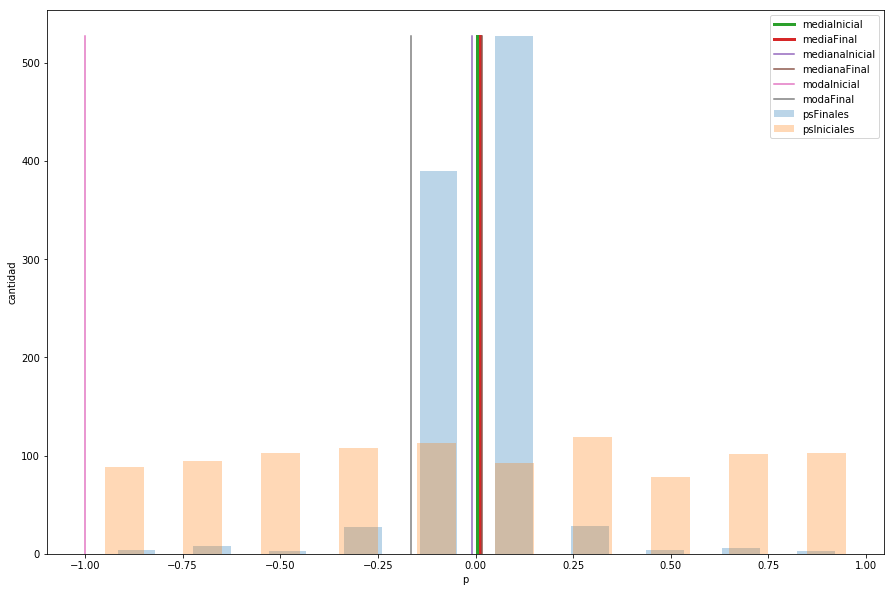

In [13]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroSinMedios.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']


# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5) 

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 2: Sociedad heterogénea (uniforme) / medios polarizados

In [14]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 2, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], file="socHeteroMediosPol.ma")

In [29]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMediosPol.ma \
        -o ./out/socHeteroMediosPol.out\
        -t 2400:00:00:00

Process is interrupted.


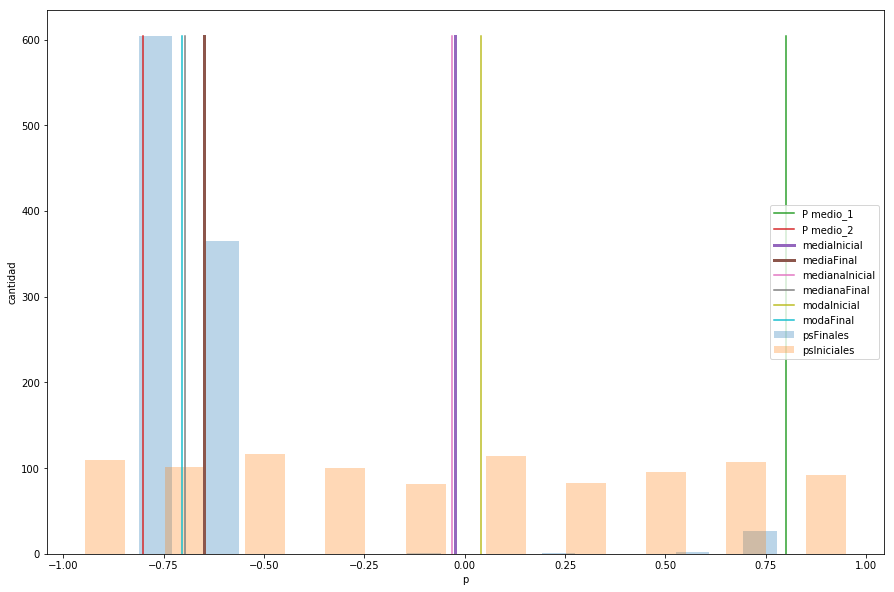

In [64]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMediosPol.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']


# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_2')

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 3: Sociedad heterogénea (uniforme) / medios heterogéneos 

In [16]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 5, psMedios = [0,-0.5,0.5,-0.9,0.9],
                  periodos_emision = [6,6,6,6,6], pcMedios = [0.5,0.5,0.5,0.5,0.5], file="socHeteroMediosHetero.ma")

In [17]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMediosHetero.ma \
        -o ./out/socHeteroMediosHetero.out\
        -t 2400:00:00:00

Process is interrupted.


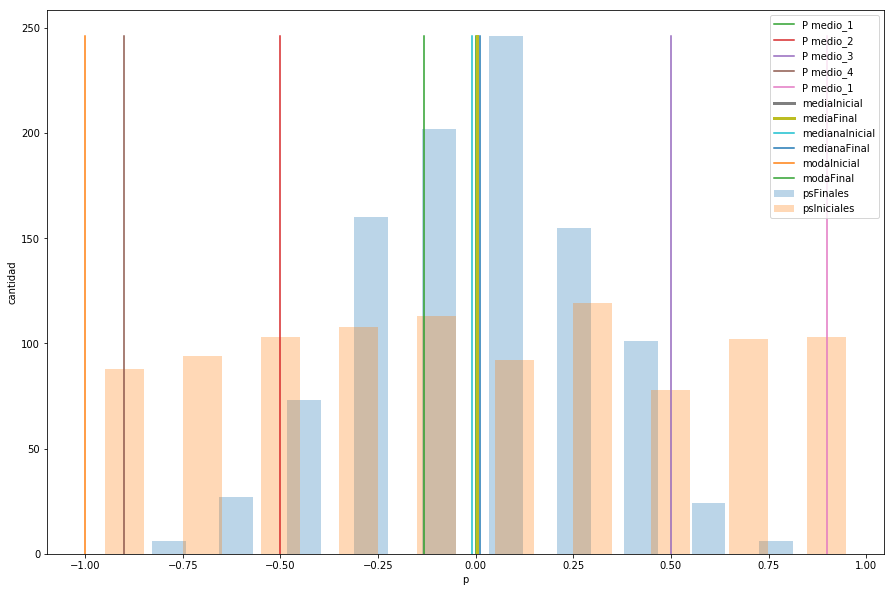

In [66]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMediosHetero.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5) 

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.5,-0.5],[0,max(histo[0])],label='P medio_2')
plt.plot([0.5,0.5],[0,max(histo[0])],label='P medio_3')
plt.plot([-0.9,-0.9],[0,max(histo[0])],label='P medio_4')
plt.plot([0.9,0.9],[0,max(histo[0])],label='P medio_5')

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 4: Sociedad heterogénea / medio homogéneo neutral 

In [19]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.0001],
                  periodos_emision = [6], pcMedios = [0.5], file="socHeteroMedioHomo.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMedioHomo.ma \
        -o ./out/socHeteroMedioHomo.out\
        -t 2400:00:00:00

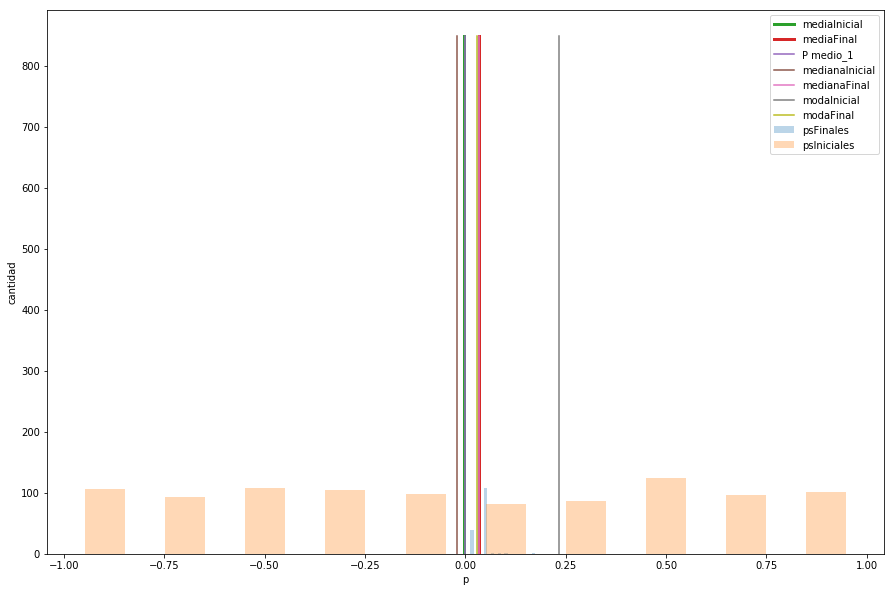

In [67]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMedioHomo.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.0001,0.0001],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 5: Sociedad heterogénea / medio homogéneo extremista

In [21]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.8],
                  periodos_emision = [6], pcMedios = [0.5], file="socHeteroMedioHomoExtremista.ma")

In [9]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMedioHomoExtremista.ma \
        -o ./out/socHeteroMedioHomoExtremista.out\
        -t 2400:00:00:00

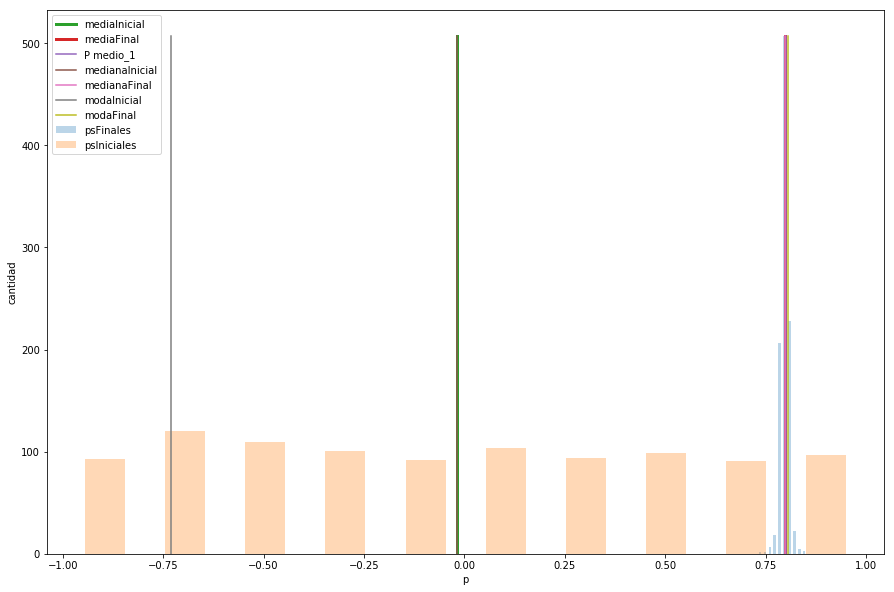

In [68]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMedioHomoExtremista.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 6: Sociedad homogenea neutral / medios de comunicación polarizados¶

In [24]:
n = 1000

nroMedios = 2

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [-0.5,0.5], file="expSocMedPolar.ma")

In [27]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocMedPolar.ma \
        -o ./out/expSocMedPolar.out\
        -t 2400:00:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./model/expSocMedPolar.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: 
Output to: ./out/expSocMedPolar.out
Tolerance set to: 1e-08
Configuration to show real numbers: Width = 12

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



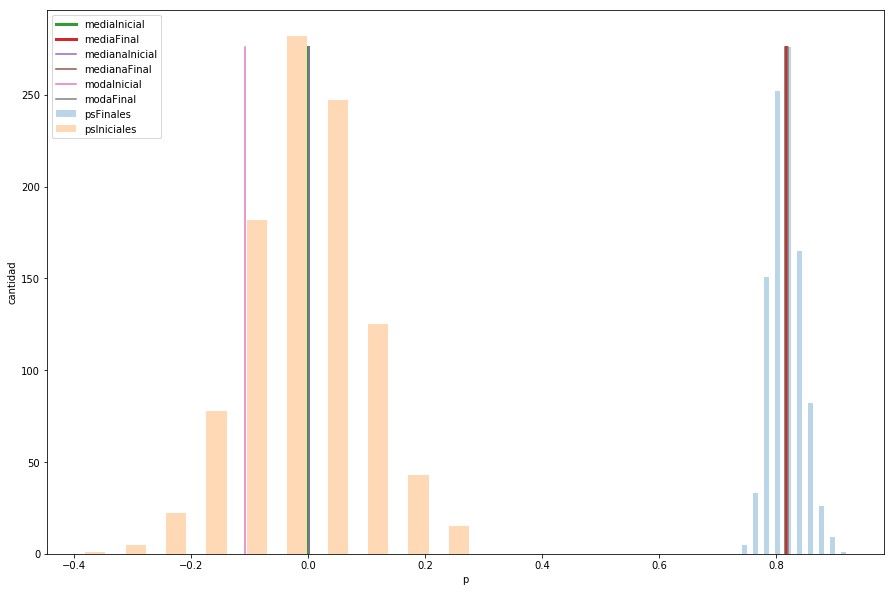

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocMedPolar.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)  



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')



# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 7 : Sociedad homogénea neutral /  medios de comunicación heterogeneos 

In [33]:
n = 1000

nroMedios = 5

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-0.9,-0.45, 0, 0.5,0.9],
                  periodos_emision = [6,6,6,6,6], pcMedios = [0.5,0.5,0.5,0.5,0.5], file="expSocHomoMedHetero.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocHomoMedHetero.ma \
        -o ./out/expSocHomoMedHetero.out\
        -t 2400:00:00:00

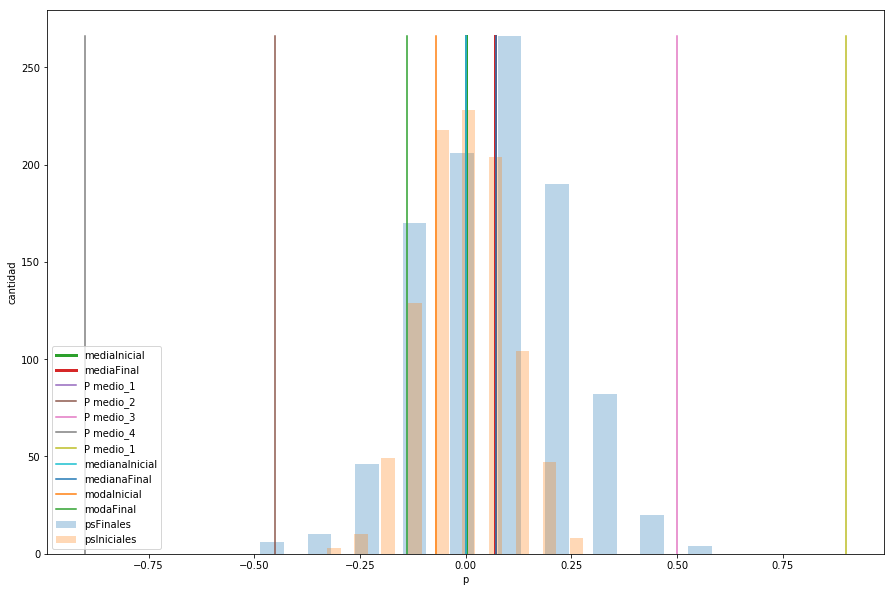

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocHomoMedHetero.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.45,-0.45],[0,max(histo[0])],label='P medio_2')
plt.plot([0.5,0.5],[0,max(histo[0])],label='P medio_3')
plt.plot([-0.9,-0.9],[0,max(histo[0])],label='P medio_4')
plt.plot([0.9,0.9],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 8 : Sociedad homogénea neutral / sin medios de comunicación 

In [36]:
n = 1000

nroMedios = 0

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [0,0],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], file="expSocHomoSinMedios.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocHomoSinMedios.ma \
        -o ./out/expSocHomoSinMedios.out\
        -t 2400:00:00:00

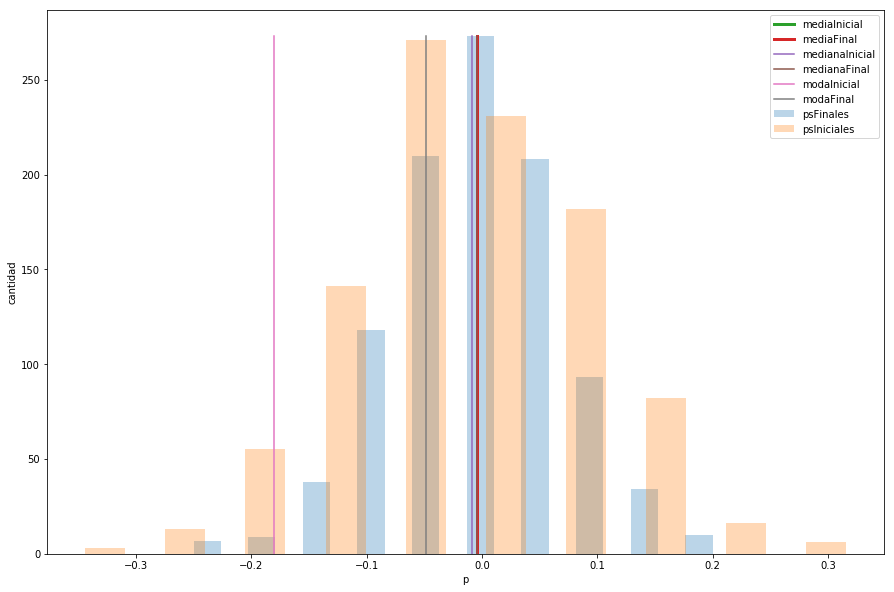

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocHomoSinMedios.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 9 : Sociedad homogénea neutral / Un medio de comunicación 

In [41]:
n = 1000

nroMedios = 1

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-0.8],
                  periodos_emision = [6], pcMedios = [0.5], file="expSocHomoUnMedioHomogeneoExtremista.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocHomoUnMedioHomogeneoExtremista.ma\
        -o ./out/expSocHomoUnMedioHomogeneoExtremista.out\
        -t 2400:00:00:00

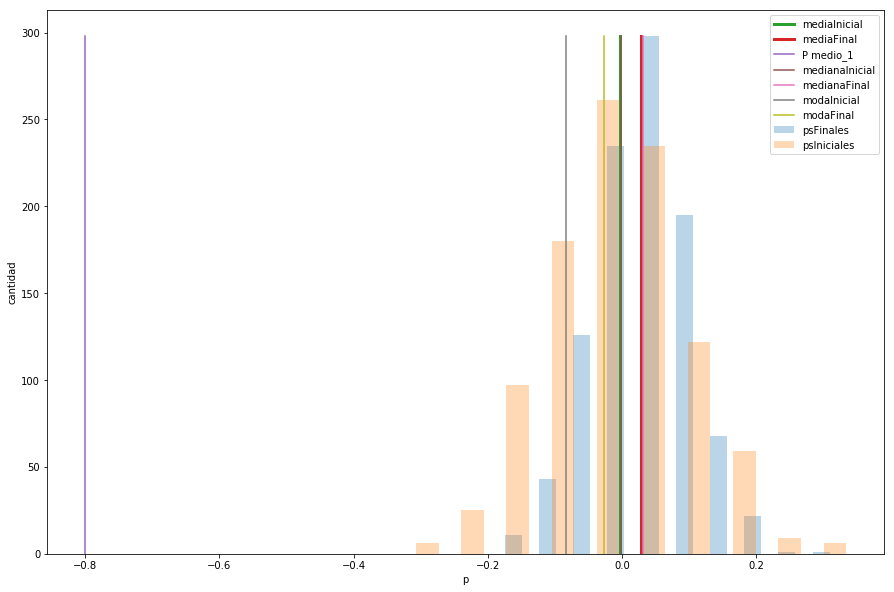

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocHomoUnMedioHomogeneoExtremista.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_1')


# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 10: Sociedad polarizada / Sin medios

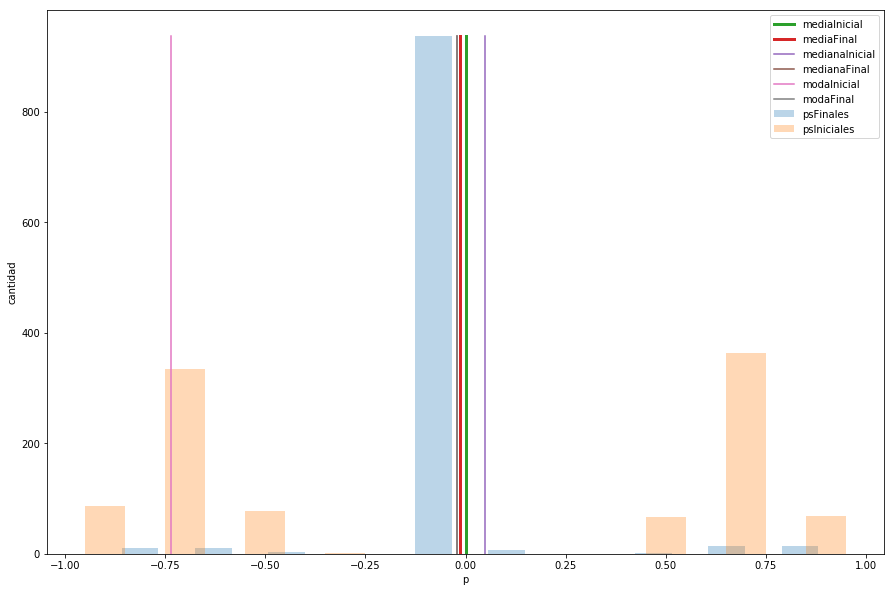

In [81]:
#Genero los valores para la sociedad polarizada con inf=0.2 y pc=0.2

n = 1000

ps = np.append(np.random.normal(0.7,0.1,int(n/2)),np.random.normal(-0.7,0.1,int(n/2)))
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.2,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 0, psMedios = [],
                  periodos_emision = [], pcMedios = [], 
                  file="exp_polarizada_sinMedios.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_sinMedios.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')



# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 11: Sociedad polarizada / Un Medio homogeneo

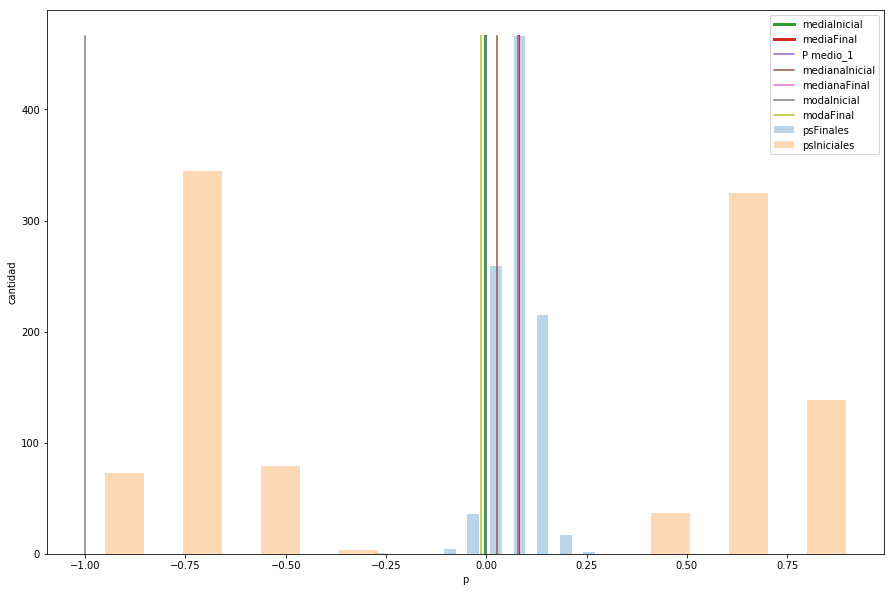

In [82]:

#Genero los valores para la sociedad polarizada con inf=0.2 y pc=0.2
grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_medioCentrado.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_medioCentrado.out"


salida_inf2 = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida_inf2.loc[salida['time'] == salida['time'].min()]

ps_finales = salida_inf2.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 12: Sociedad polarizada / Medios polarizados

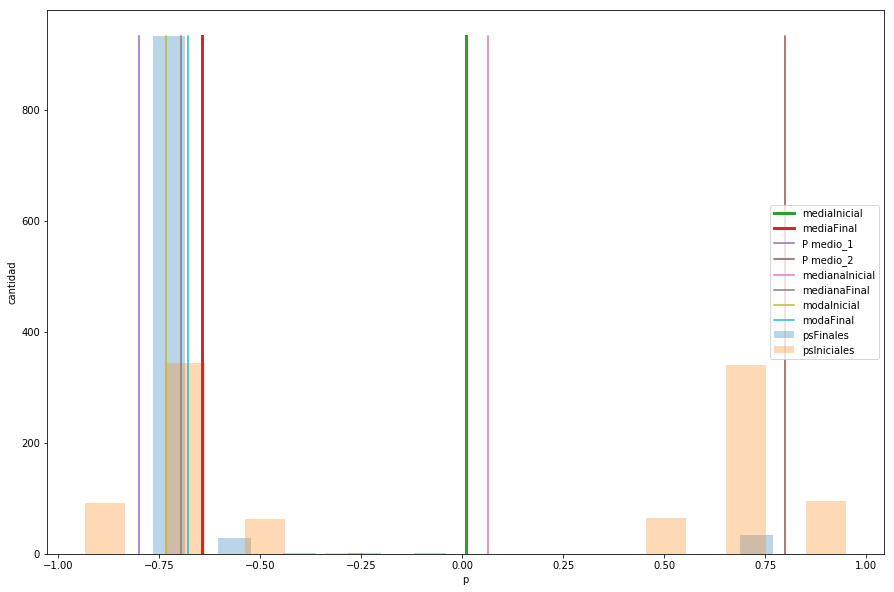

In [79]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 2, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], 
                  file="exp_polarizada_mediosPolarizados.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_mediosPolarizados.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_1')
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_2')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 13: Sociedad polarizada / Medios heterogeneos

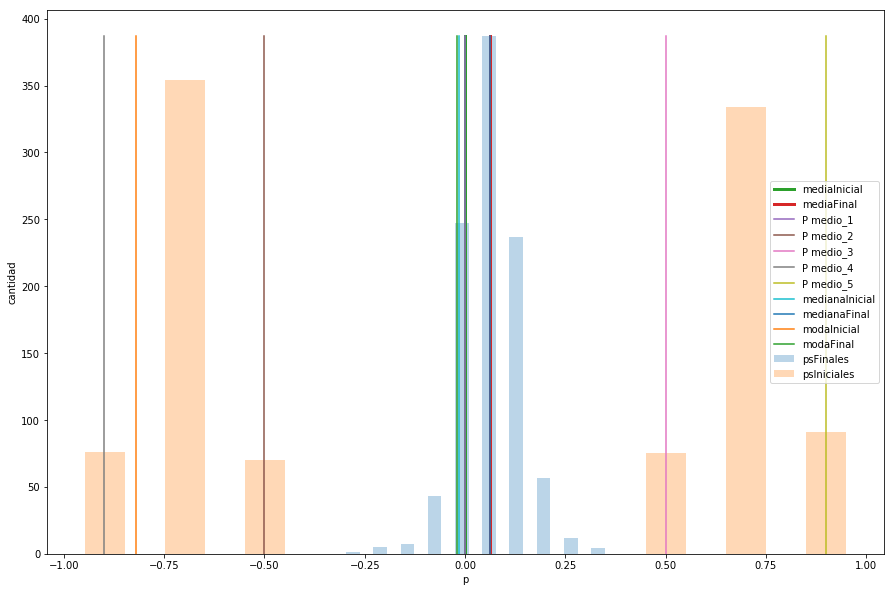

In [78]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 5, psMedios = [-0.9, -0.5, 0, 0.5, 0.9],
                  periodos_emision = [6,6,6,6,6], 
                  pcMedios = [0.5,0.5,0.5,0.5,0.5], 
                  file="exp_polarizada_mediosHeterogeneos.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_mediosHeterogeneos.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.5,-0.5],[0,max(histo[0])],label='P medio_2')
plt.plot([0.5,0.5],[0,max(histo[0])],label='P medio_3')
plt.plot([-0.9,-0.9],[0,max(histo[0])],label='P medio_4')
plt.plot([0.9,0.9],[0,max(histo[0])],label='P medio_5')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

## Experimento 14: Sociedad polarizada / Medio homogéneo extremista 

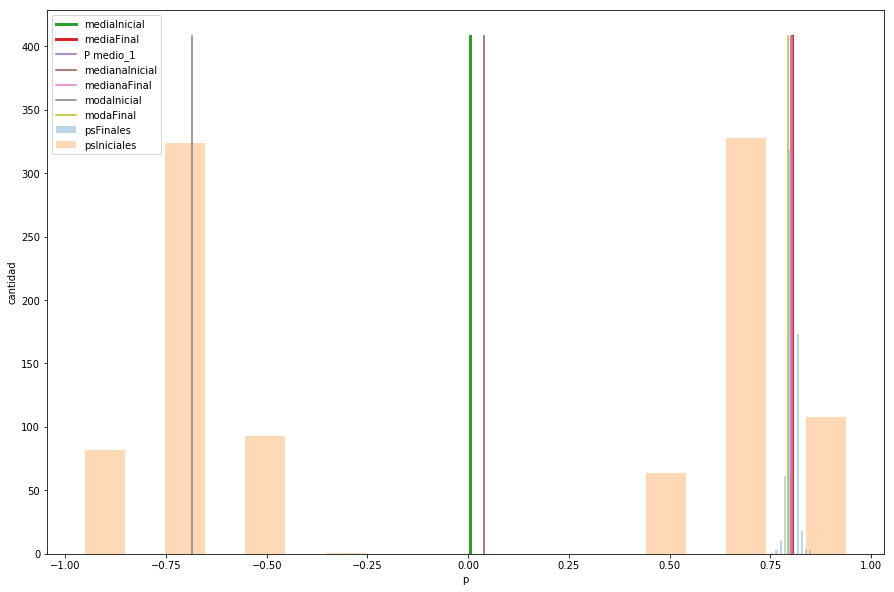

In [76]:

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.8],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_medioExtremista.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_medioExtremista.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()